In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# sns.set(font_scale=1.2);

# Prepare Data
## Load Data

In [2]:
df = pd.read_csv('../_input/islr/Credit.csv', index_col=False)
df = df.iloc[:,1:]
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Preview Variables

In [3]:
df.keys()

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [4]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
cat = [f for f in df.columns if df.dtypes[f] == 'object']
num.remove('Balance')
target = 'Balance' # Target. What we want to predict

In [5]:
num

['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']

In [6]:
cat

['Gender', 'Student', 'Married', 'Ethnicity']

In [7]:
target

'Balance'

## Understand the Target
We want to understand the Balance

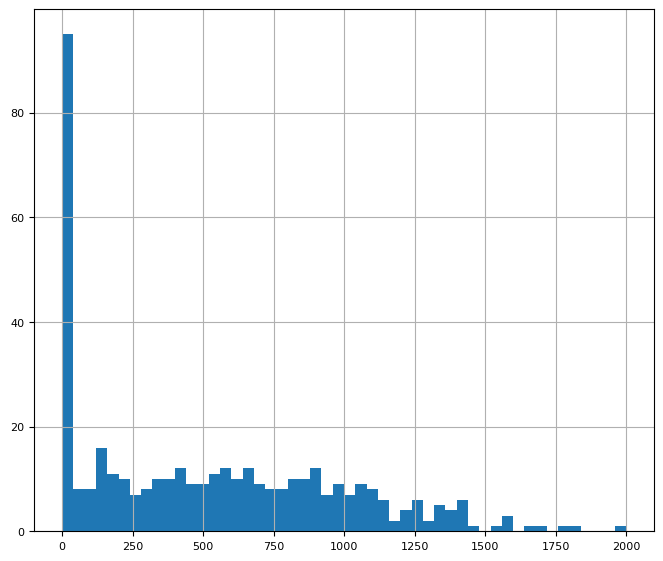

In [8]:
df[target].hist(bins=50);

In [9]:
df[target].isnull().sum()

0

In [10]:
df[target].describe()

count     400.000000
mean      520.015000
std       459.758877
min         0.000000
25%        68.750000
50%       459.500000
75%       863.000000
max      1999.000000
Name: Balance, dtype: float64

## Create Test Set

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [12]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

# Explore
## Correlation

In [13]:
import statsmodels.formula.api as sm
est = sm.ols(formula='Balance ~ Student', data=train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     19.51
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.37e-05
Time:                        03:38:25   Log-Likelihood:                -2414.0
No. Observations:                 320   AIC:                             4832.
Df Residuals:                     318   BIC:                             4840.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        482.4034     26.928     17.

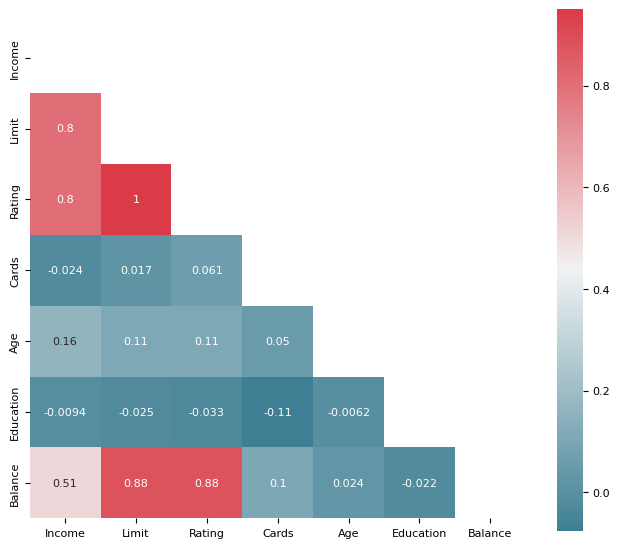

In [14]:
corr = train.corr()
mask = np.zeros_like(corr, dtype='bool')
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot=True
            , square=True
            , mask=mask
            , cmap=sns.diverging_palette(220, 10, as_cmap=True), robust=True);

## Do 3 Graphs

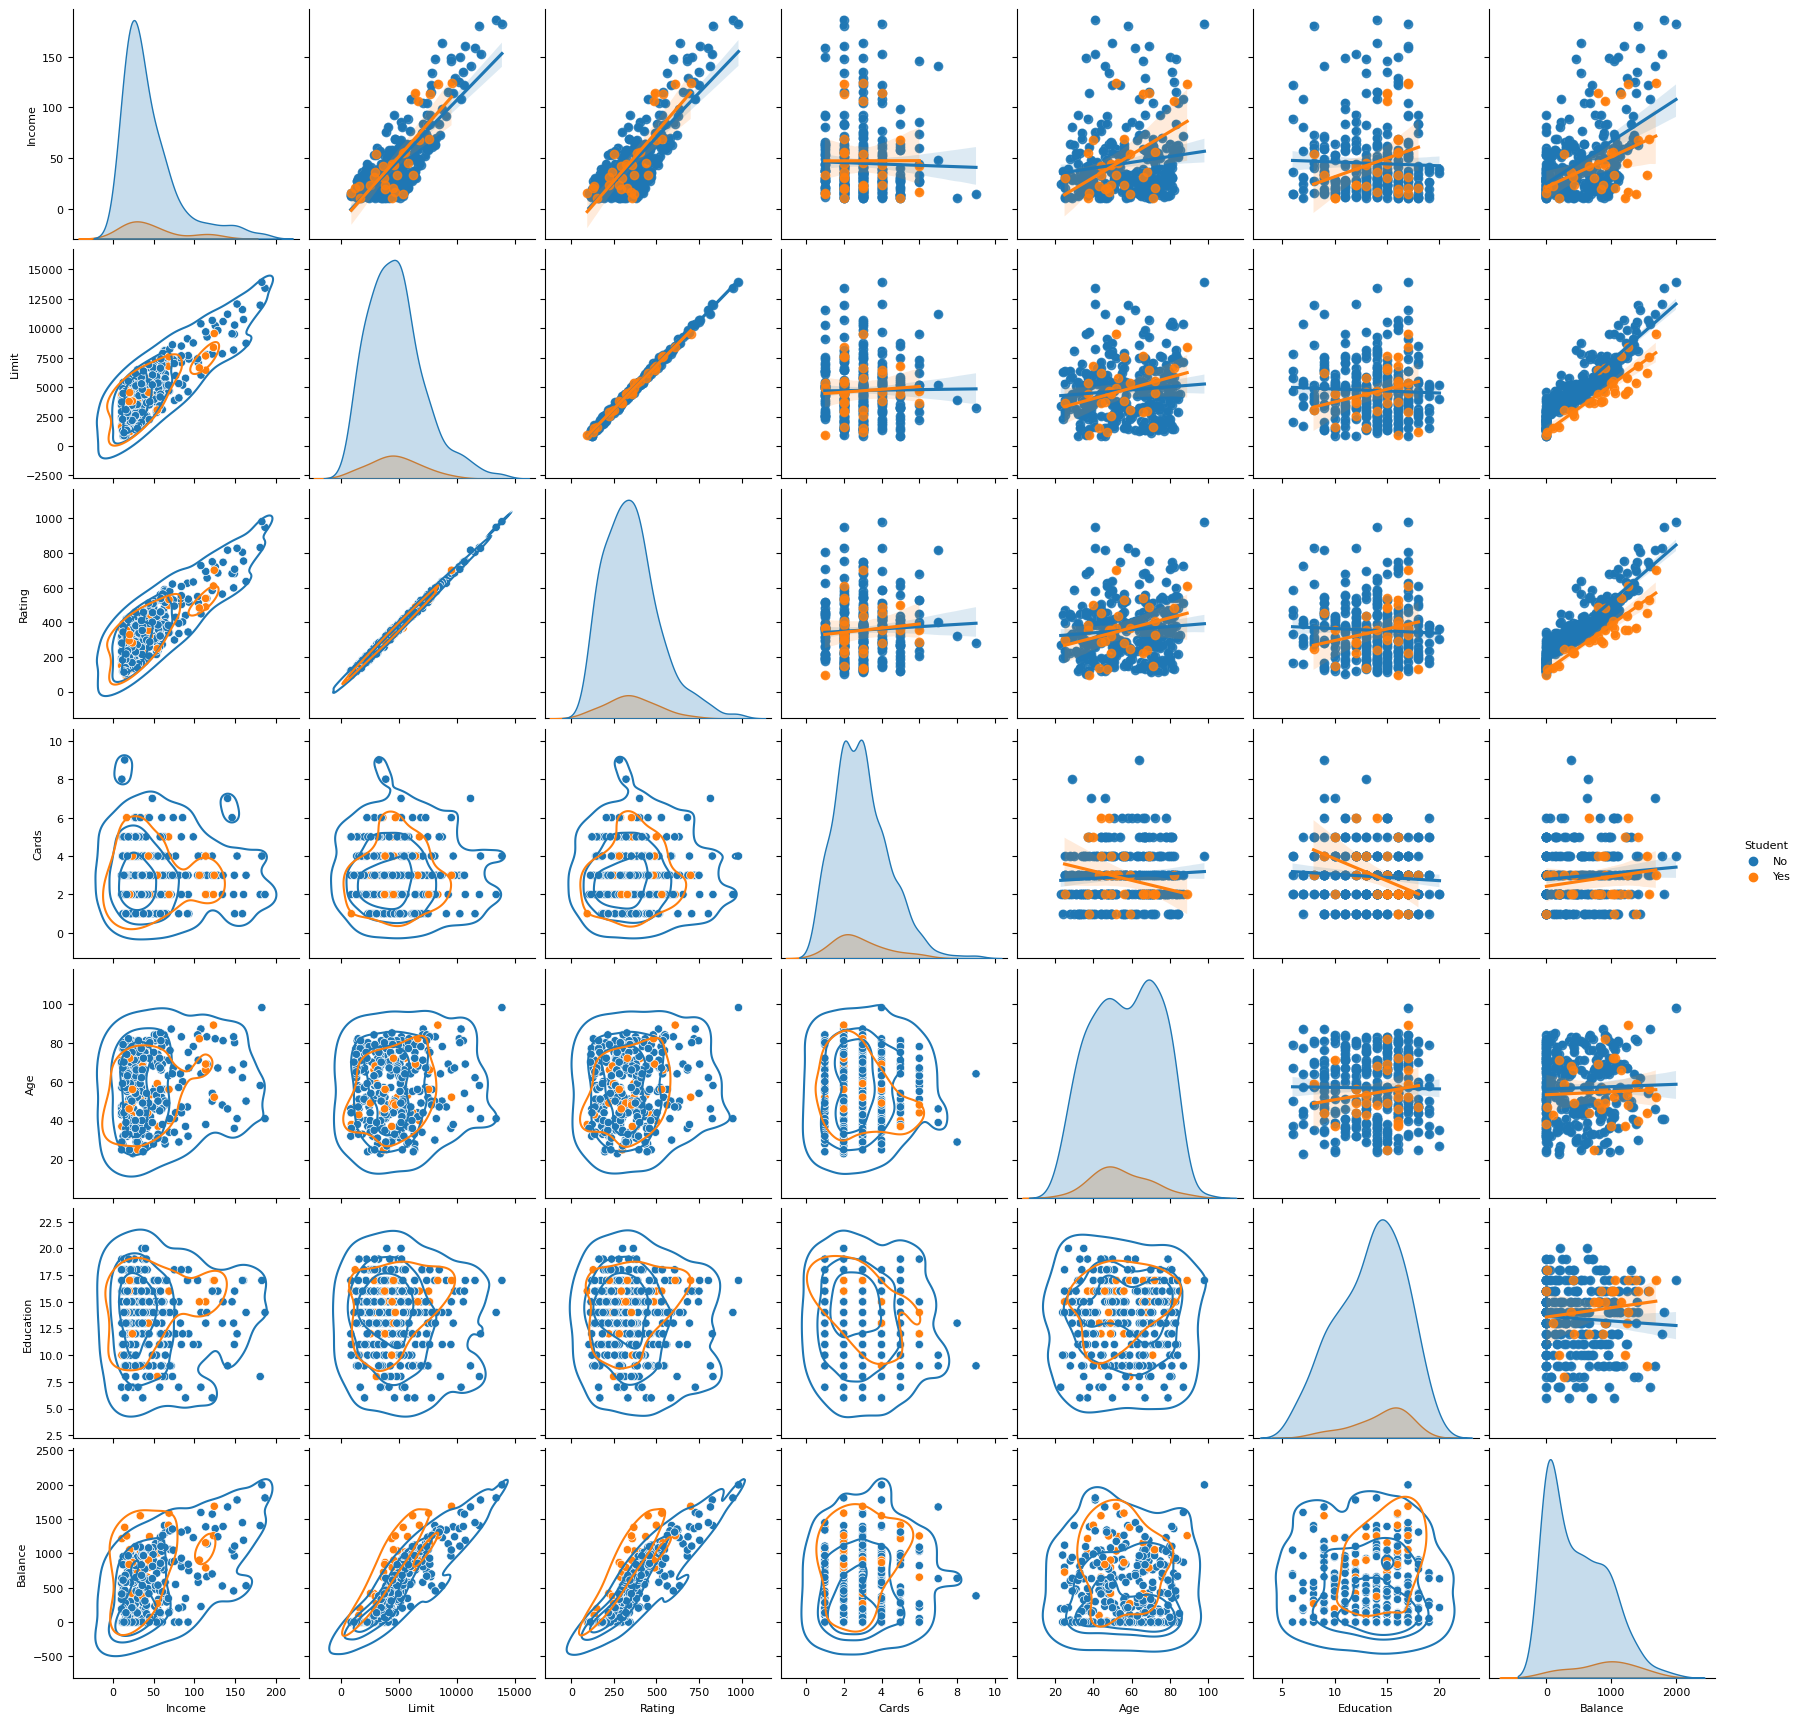

In [15]:
g = sns.pairplot(train, hue="Student", hue_order=["No", "Yes"])
g.map_lower(sns.kdeplot, levels=4)
g.map_upper(sns.regplot);

## Manual

In [17]:
train.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,148.924,9504,681,3,36,11,Female,No,No,Asian,964
1,49.570,6384,448,1,28,9,Female,No,Yes,Asian,891
2,21.038,1448,145,2,58,13,Female,No,Yes,Caucasian,0
3,10.363,2430,191,2,47,18,Female,No,Yes,Asian,0
4,30.550,5869,439,5,81,9,Female,No,No,African American,967


In [18]:
student = np.where(train['Student']=="Yes", 1, 0)

In [19]:
student.mean()

0.09375

In [20]:
balance = train[target]
balance.mean()

518.825

In [21]:
distance_coeff = sum((student - student.mean()) * (balance - balance.mean()))
distance_coeff

10562.25000000002

In [22]:
spread_x = sum((student - student.mean())**2)
spread_x

27.1875

In [23]:
slope = distance_coeff / spread_x
slope

388.49655172413867

In [24]:
intercept = balance.mean() - slope * student.mean()
intercept

482.40344827586205

In [25]:
yhat = intercept + slope * student
yhat

array([482.40344828, 482.40344828, 482.40344828, 482.40344828,
       482.40344828, 482.40344828, 870.9       , 482.40344828,
       482.40344828, 482.40344828, 482.40344828, 482.40344828,
       482.40344828, 870.9       , 482.40344828, 482.40344828,
       870.9       , 482.40344828, 482.40344828, 482.40344828,
       482.40344828, 482.40344828, 482.40344828, 482.40344828,
       482.40344828, 482.40344828, 482.40344828, 482.40344828,
       482.40344828, 482.40344828, 482.40344828, 482.40344828,
       482.40344828, 482.40344828, 482.40344828, 482.40344828,
       482.40344828, 482.40344828, 482.40344828, 482.40344828,
       870.9       , 482.40344828, 482.40344828, 482.40344828,
       482.40344828, 482.40344828, 482.40344828, 482.40344828,
       482.40344828, 482.40344828, 482.40344828, 482.40344828,
       482.40344828, 482.40344828, 482.40344828, 482.40344828,
       482.40344828, 482.40344828, 870.9       , 482.40344828,
       482.40344828, 482.40344828, 482.40344828, 482.40

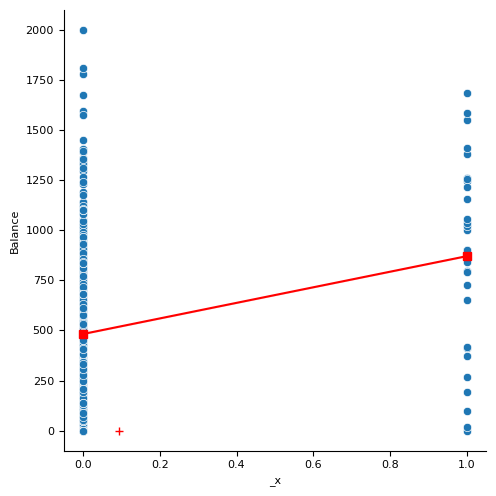

In [68]:
sns.relplot(data=train, x=student, y='Balance', ci=False);
sns.lineplot(x=student, y=yhat, color='red');
plt.plot(0, train.query('Student=="No"')['Balance'].mean(), 'rs');
plt.plot(1, train.query('Student=="Yes"')['Balance'].mean(), 'rs');
plt.plot(student.mean(), 0, 'r+');

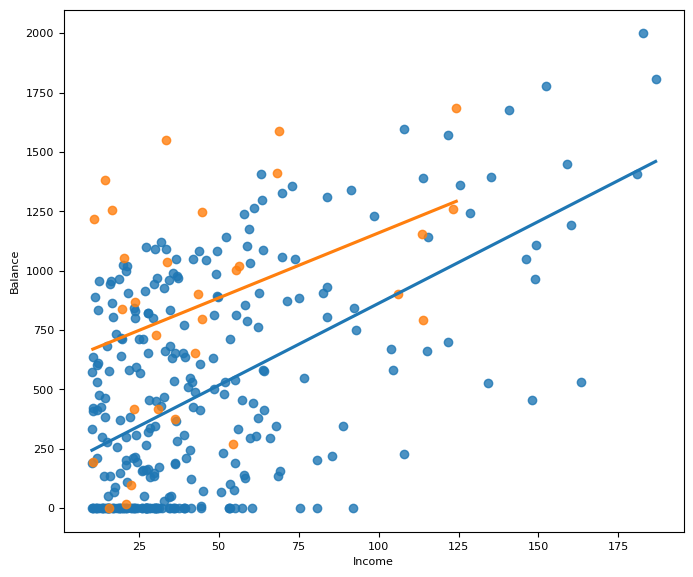

In [27]:
sns.regplot(data=train.query('Student=="No"'), x='Income', y='Balance', ci=False);
sns.regplot(data=train.query('Student=="Yes"'), x='Income', y='Balance', ci=False);